In [1]:
%matplotlib inline
import os
import xlrd
import numpy as np
from datetime import datetime
import datetime as dt
import consisteproc
import matplotlib.pylab as pl
import pandas as pd

In [2]:
dmag = -23
pathname = os.environ['HOME'] + '/Documents/database/Historical/Buoys/PNBOIA/marinha/BGA/'

In [13]:
#list files

lis = os.listdir(pathname)
l = []
for li in lis:
    if li.endswith('.xls'):
        l.append(li)
l = np.sort(l)
l

array(['PNBOIA_BGA_201511.xls', 'PNBOIA_BGA_201512.xls',
       'PNBOIA_BGA_201601.xls', 'PNBOIA_BGA_201603.xls',
       'PNBOIA_BGA_201604.xls', 'PNBOIA_BGA_201605.xls',
       'PNBOIA_BGA_201607.xls', 'PNBOIA_BGA_201608.xls',
       'PNBOIA_BGA_201609.xls'], 
      dtype='<U21')

In [15]:
#loop to concatenate

dd = pd.DataFrame()

for i in range(len(l)):
    
    print (l[i])

    workbook = xlrd.open_workbook(pathname + l[i])

    #seleciona planilha por indice (pode ser por nome tbm)
    sheet_0 = workbook.sheet_by_index(0) #planilha 1 - status + vento
    sheet_1 = workbook.sheet_by_index(1) #planilha 2 - meteo + onda

    #pega os valores das celulas selecionadas
    leg0 = np.array([[sheet_0.cell_value(r,c) for r in range(3,4)] for c in range(0,sheet_0.ncols)]).T
    leg1 = np.array([[sheet_1.cell_value(r,c) for r in range(3,4)] for c in range(0,sheet_1.ncols)]).T
    
    #dados - inverte - flipud
    dd0 = np.flipud(np.array([[sheet_0.cell_value(r,c) for r in range(4,sheet_0.nrows)] for c in range(sheet_0.ncols)]).T)
    dd1 = np.flipud(np.array([[sheet_1.cell_value(r,c) for r in range(4,sheet_1.nrows)] for c in range(sheet_1.ncols)]).T)

    #substitui 'xxxx' por nan
    dd0[np.where(dd0=='xxxx')] = np.nan
    dd1[np.where(dd1=='xxxx')] = np.nan
    dd0[np.where(dd0=='xxxxx')] = np.nan
    dd1[np.where(dd1=='xxxxx')] = np.nan    
    dd0[np.where(dd0=='x')] = np.nan
    dd1[np.where(dd1=='x')] = np.nan
    dd0[np.where(dd0=='xxx')] = np.nan
    dd1[np.where(dd1=='xxx')] = np.nan
    dd0[np.where(dd0=='XXX')] = np.nan
    dd1[np.where(dd1=='XXX')] = np.nan
    dd0[np.where(dd0=='XXXX')] = np.nan
    dd1[np.where(dd1=='XXXX')] = np.nan
    dd0[np.where(dd0=='')] = np.nan
    dd1[np.where(dd1=='')] = np.nan
    dd0[np.where(dd0==' ')] = np.nan
    dd1[np.where(dd1==' ')] = np.nan

    #monta dataframe

    df0 = pd.DataFrame(dd0[:,[1,3,5,6,7,8,9,10]],columns=['date','bat','ws1','wg1','wd1','ws2','wg2','wd2'])
    df1 = pd.DataFrame(dd1[:,[1,2,3,4,5,6,7,8,9,10]],columns=['date','at','rh','dwp','pr','sst','hs','hmax','tp','dp'])

    df0['date'] = pd.to_datetime(df0.date)
    df1['date'] = pd.to_datetime(df1.date)

    df0 = df0.set_index('date')
    df1 = df1.set_index('date')

    df0 = df0.astype(float)
    df1 = df1.astype(float)

    #corrige declinacao magnetica
    df0[['wd1','wd2']] = df0[['wd1','wd2']] + dmag #corrige a declinacao magnetica para cada boia
    df1['dp'] = df1['dp'] + dmag

    #reamostra de hora em hora
    df0 = df0.resample('H').mean()
    df1 = df1.resample('H').mean()

    #junta os dois dados
    df = df1.join(df0)
    
    #concatenate
    dd = pd.concat([dd,df])

PNBOIA_BGA_201511.xls
PNBOIA_BGA_201512.xls
PNBOIA_BGA_201601.xls
PNBOIA_BGA_201603.xls
PNBOIA_BGA_201604.xls
PNBOIA_BGA_201605.xls
PNBOIA_BGA_201607.xls
PNBOIA_BGA_201608.xls
PNBOIA_BGA_201609.xls


In [16]:
dd0.shape

(125, 11)

In [18]:
dd.to_csv(pathname + 'PNBOIA_XLS_BGA.csv', na_rep='nan')

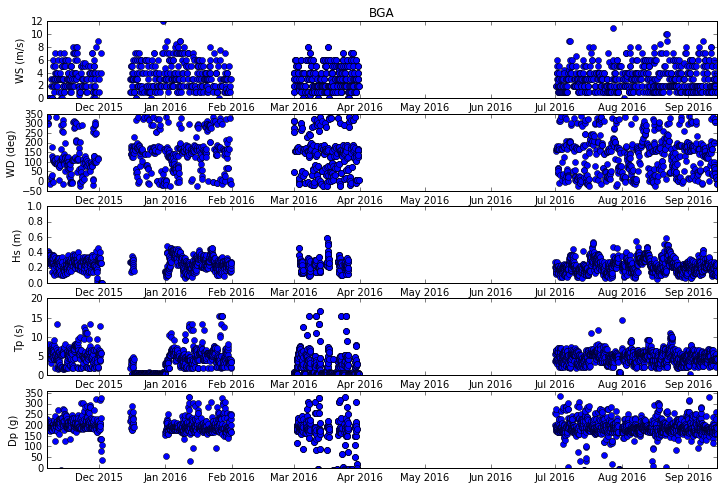

In [22]:
pl.figure(figsize=(12,8))
pl.subplot(511)
pl.plot(dd.index,dd.ws1,'o')
pl.ylabel('WS (m/s)')
pl.title('BGA')
pl.subplot(512)
pl.plot(dd.index,dd.wd1,'o')
pl.ylabel('WD (deg)')
pl.subplot(513)
pl.plot(dd.index,dd.hs,'o')
pl.ylim(0,1)
pl.ylabel('Hs (m)')
pl.subplot(514)
pl.plot(dd.index,dd.tp,'o')
pl.ylabel('Tp (s)')
pl.ylim(0,20)
pl.subplot(515)
pl.plot(dd.index,dd.dp,'o')
pl.ylim(0,360)
pl.ylabel('Dp (g)')
pl.savefig(pathname + 'PNBOIA_XLS_BGA.png')
pl.show()